In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt      
import seaborn as sns
%matplotlib inline

In [3]:
hotels = pd.read_csv('CleanHotels.csv')

In [5]:
hotels.head()

,Name,City,Price,Rating,Stars,Reviews,Location,Cleanliness,staff,Comfort,Value for Money,Facilities,Wifi,Closest attraction dist,Closest transportation,Closest airport,payment methods,Number of languages,Allowing pets
0,Schulz Hotel Berlin Wall at the East Side Gal...,Budapest,191.0,8.7,3,18362,9.2,9.0,9.0,8.8,8.6,8.6,9.1,2.0,0.2,17.0,4.0,4,True
1,Novotel Suites Berlin City Potsdamer Platz,Budapest,259.0,8.2,3,4463,9.1,8.5,8.4,8.3,8.4,8.2,7.8,0.7,0.5,17.9,6.0,6,True
2,NH Collection Berlin Mitte Friedrichstrasse,Budapest,371.0,8.8,4,6220,9.6,9.0,9.0,9.0,8.5,8.8,8.8,0.9,0.1,19.3,6.0,4,True
3,Ibis budget Berlin Potsdamer Platz,Budapest,156.0,7.8,1,4716,9.0,8.6,8.3,8.1,7.6,7.4,8.4,0.8,0.4,17.9,4.0,5,True
4,Hollywood Media Hotel am Kurfürstendamm,Budapest,246.0,8.4,4,3505,9.4,8.8,8.6,8.6,8.4,8.4,8.6,3.4,0.4,20.0,7.0,2,True


In [6]:
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710 entries, 0 to 5709
Data columns (total 19 columns):
Name                       5710 non-null object
City                       5710 non-null object
Price                      5710 non-null float64
Rating                     5710 non-null float64
Stars                      5710 non-null int64
Reviews                    5710 non-null int64
Location                   5710 non-null float64
Cleanliness                5710 non-null float64
staff                      5710 non-null float64
Comfort                    5710 non-null float64
Value for Money            5710 non-null float64
Facilities                 5710 non-null float64
Wifi                       5710 non-null float64
Closest attraction dist    5710 non-null float64
Closest transportation     5710 non-null float64
Closest airport            5710 non-null float64
payment methods            5710 non-null float64
Number of languages        5710 non-null int64
Allowing pets      

# Amount of hotels from each city in our DB 

Text(0.5, 1.0, 'Number of hotels in each City')

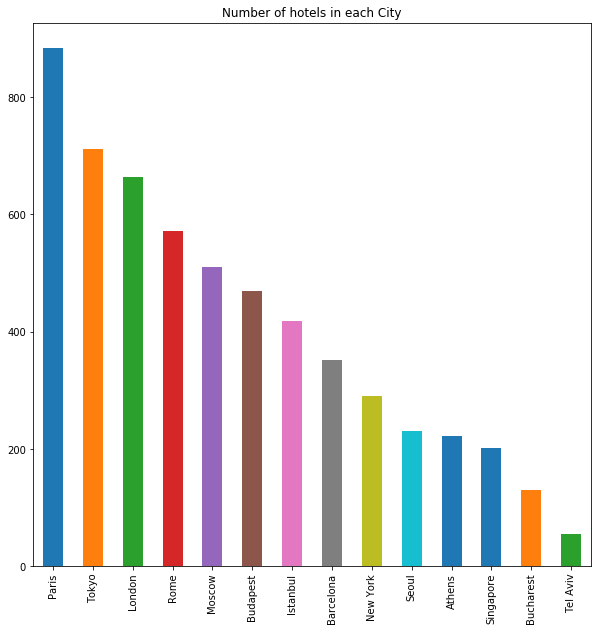

In [7]:
hotels['City'].value_counts().plot(kind='bar', figsize=(10, 10))
plt.title('Number of hotels in each City')


# Distribution of hotel's stars among cities around the world

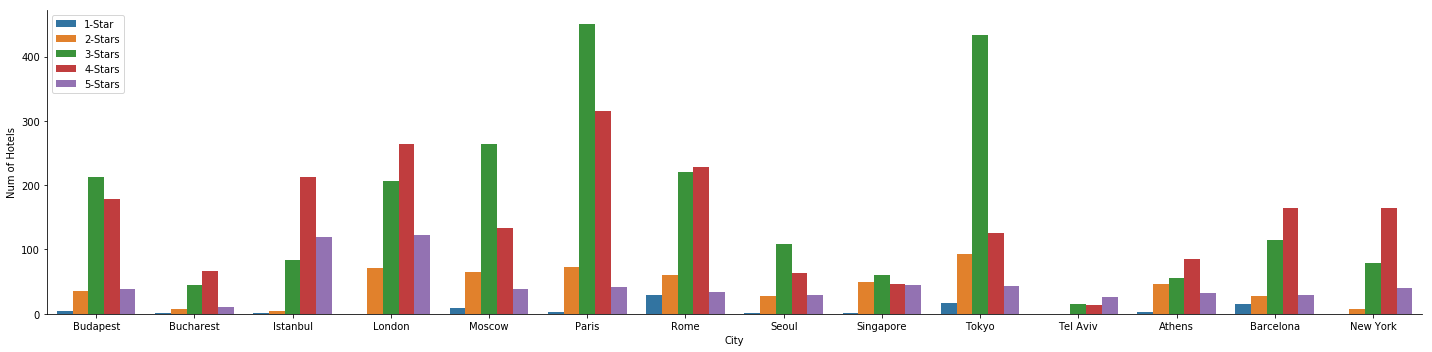

In [11]:
g = sns.catplot(
    x='City', 
    data = hotels,
    kind='count', 
    hue='Stars',
    height=5, 
    aspect=4,
    legend=False,
    ).set_axis_labels('City', 'Num of Hotels')
g.ax.legend(labels=['1-Star','2-Stars','3-Stars','4-Stars','5-Stars'])

# Mean of hotel's rating by city

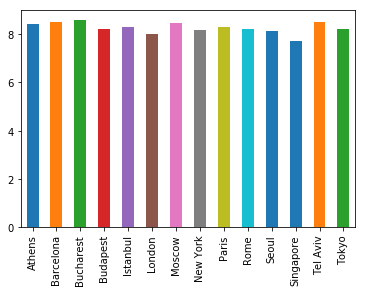

In [10]:
ratingmean = pd.Series(hotels.groupby('City').Rating.mean(), index=['Athens', 'Barcelona', 'Bucharest', 'Budapest','Istanbul','London','Moscow','New York', 'Paris','Rome','Seoul','Singapore','Tel Aviv', 'Tokyo'])
ratingmean.plot(kind='bar')

As we can see from both graphs above, despite the difference in the hotels stars ratio between the cities, the visitor's rating is almost identical.

# Median price per night in each city

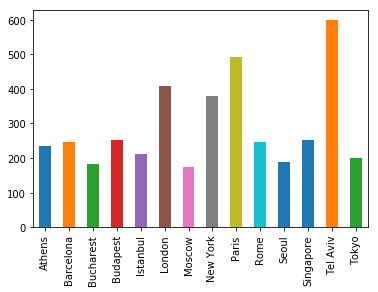

In [11]:
priceMean = pd.Series(hotels.groupby('City').Price.median(), index=['Athens', 'Barcelona', 'Bucharest', 'Budapest','Istanbul','London','Moscow','New York', 'Paris','Rome','Seoul','Singapore','Tel Aviv', 'Tokyo'])
priceMean.plot(kind='bar')

As we can see, Altough some cities considered expensive (Tokyo, London, etc.),
their hotel prices remains rationaly the same as other cities.
Also, our finding support the claim that Tel Aviv is the most expensive city in the world.

# Distribution of hotel's stars in our across the world

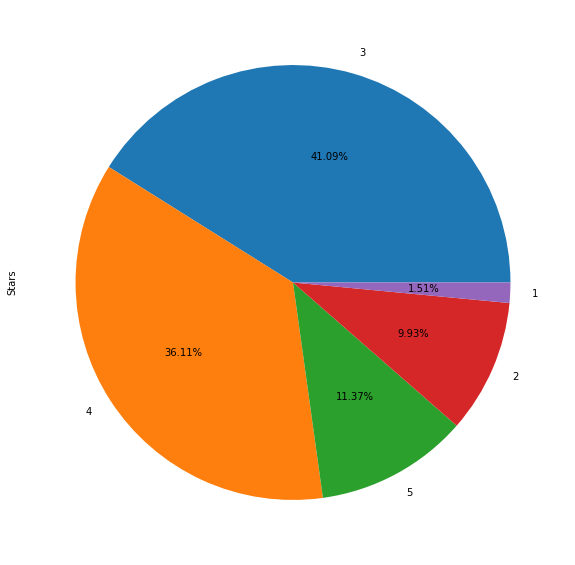

In [52]:
hotels.Stars.value_counts().plot(kind='Pie',autopct="%.2f%%", figsize= (20,10))

In [57]:
pd.cut(hotels.Rating,range(0,11,2)).value_counts()

(8, 10]    3813
(6, 8]     1833
(4, 6]       64
(2, 4]        0
(0, 2]        0
Name: Rating, dtype: int64

As we can tell by the output, there are no hotels with rating lower than 4


# Ratio between the amount of hotels to their rating

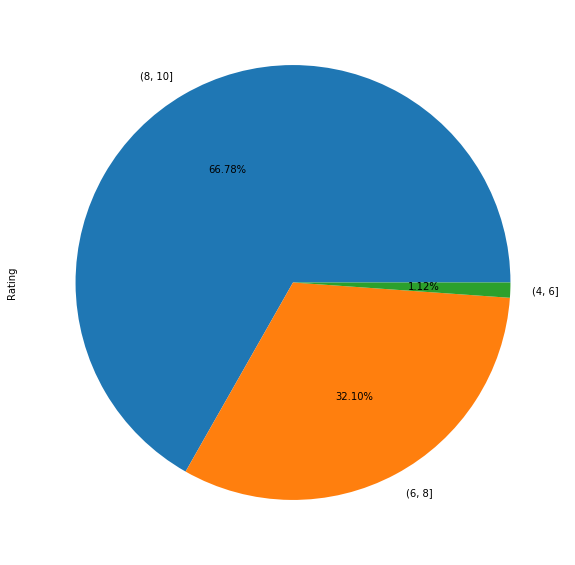

In [61]:
pd.cut(hotels.Rating,range(4,11,2)).value_counts().plot(kind='Pie',autopct="%.2f%%", figsize=(10,10))

As we can see, Although most of the hotels are 3 stars and below, most of the rating scores are between 8 and 10. 

# Ratio between hotel number of reviews to is rating

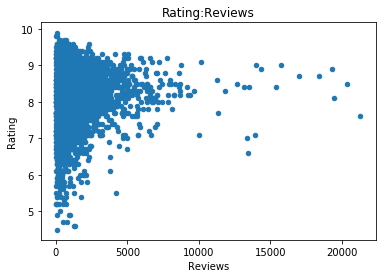

In [64]:
hotels.plot(x='Reviews', y= 'Rating', kind='scatter',title= 'Rating:Reviews')

As we can see, people were more inclined to rate the hotel when they had a good time.

# Ratio between hotel's rating to it's Location score

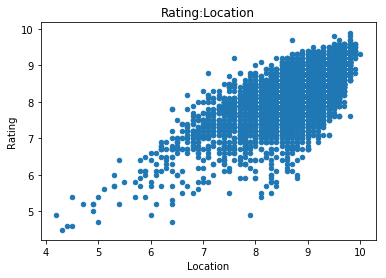

In [68]:
hotels.plot(x='Location', y= 'Rating', kind='scatter',title= 'Rating:Location')

As we can see, there is direct connection between the location score to the overall rating.

# Ratio between a hotel's price to it's Location score

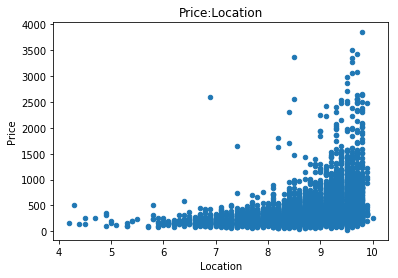

In [70]:
hotels.plot(x='Location', y= 'Price', kind='scatter',title= 'Price:Location')

As we can see, whenever the location score is relatively low the price will be accordingly low.
additionally the location score is high it's price is roughly up to doubled on most cases.

# Ratio between hotel's that allowing pets and those who are not

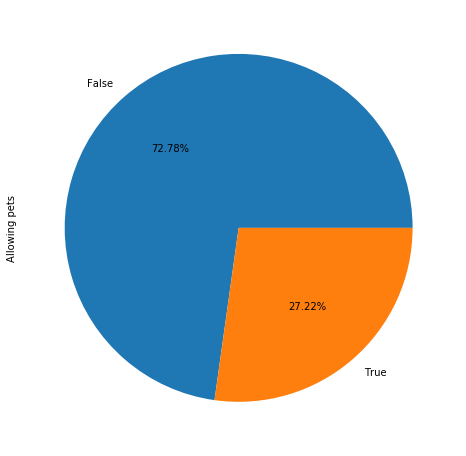

In [74]:
hotels['Allowing pets'].value_counts().plot(kind='Pie', autopct="%.2f%%", figsize=(8,8))

# Median price difference between hotels that are allowing pets to those who does not

[339.0, 251.0]


<BarContainer object of 2 artists>

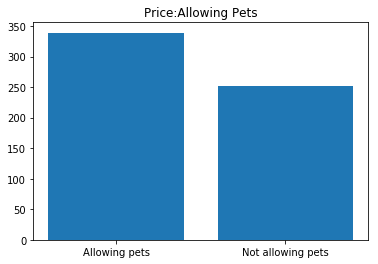

In [91]:
prices = [hotels[hotels['Allowing pets']==True].Price.median(),
          hotels[hotels['Allowing pets']==False].Price.median()]
print(prices)
plt.figure()
plt.subplot(111)
plt.axis('on')
plt.title('Price:Allowing Pets')
plt.bar(['Allowing pets','Not allowing pets'], prices)

We can clearly see, that hotels that allowing pets inside them are likely to be more expensive.

# Median of cleanliness score between hotels who are allowing pets to those who are not

[8.9, 8.8]


<BarContainer object of 2 artists>

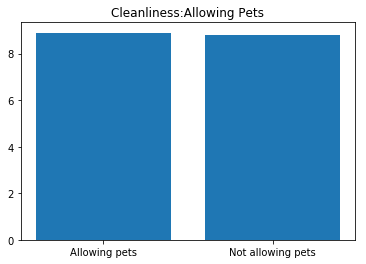

In [92]:
cleanScore = [hotels[hotels['Allowing pets']==True].Cleanliness.median(),
              hotels[hotels['Allowing pets']==False].Cleanliness.median()]
print(cleanScore)
plt.figure()
plt.subplot(111)
plt.axis('on')
plt.title('Cleanliness:Allowing Pets')
plt.bar(['Allowing pets','Not allowing pets'], cleanScore)

We can clearly see, that although the different policy about pets, it is not affecting the hotel's cleanliness score.